dS/dt=-bSI+gI, dI/dt=bSI-gI (uso b para beta y g para gamma)

In [1]:
from sympy import *
from sympy.abc import S,I,t,b,g

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [2]:
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (g/b, I)]
⎡-I⋅b  -S⋅b + g⎤
⎢              ⎥
⎣I⋅b   S⋅b - g ⎦


In [3]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1)
pprint(Jc1.eigenvals())
pprint(Jc1.eigenvects())
Jc2=J.subs([(S,g/b),(I,I)])
pprint(Jc2)
pprint(Jc2.eigenvals())
pprint(Jc2.eigenvects())

⎡0  -S⋅b + g⎤
⎢           ⎥
⎣0  S⋅b - g ⎦
{0: 1, S⋅b - g: 1}
⎡⎛      ⎡⎡1⎤⎤⎞  ⎛            ⎡⎡-1⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜S⋅b - g, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝            ⎣⎣1 ⎦⎦⎠⎦
⎡-I⋅b  0⎤
⎢       ⎥
⎣I⋅b   0⎦
{0: 1, -I⋅b: 1}
⎡⎛      ⎡⎡0⎤⎤⎞  ⎛         ⎡⎡-1⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜-I⋅b, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝         ⎣⎣1 ⎦⎦⎠⎦


Los puntos criticos son no hiperbolicos, por lo que no cumplen el teorema de Hartmann.

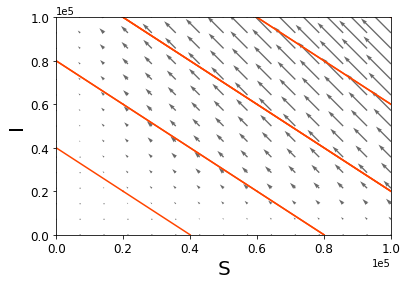

In [2]:
b=1
g=1
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(20000,100000,3)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"-", color="orangered", lw=1.5)
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(20000,100000,3)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"-", color="orangered", lw=1.5)
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=20)
plt.ylabel('I',fontsize=20)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style="sci", scilimits=(0,0))
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:15j,0:100000:15j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='dimgray')
plt.savefig("SISinf.pdf",bbox_inches='tight')
plt.show()

Analsis de Bifurcaciones

El sistema tiene dos puntos criticos, (S,0) y (gamma/beta,I), el primer punto no depende de gamma ni beta, por lo que no cambia. 